In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

from pae.circuit import make_Ua_ry_qc, make_V_phi_qc, make_parallel_qc
from pae.qsp import calculate_angle_sequence
from pae.estimate import estimate_a_rqpe
from pae.utils import sampling_circuit, process_result, calc_oracle_calls

# [Test] check circuit construction

### Make operator Ua

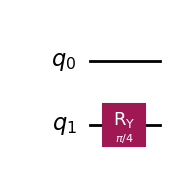

In [2]:
n_qubit = 2
ry_angle = 1 / 4 *math.pi

Ua_qc, amplitude, theta = make_Ua_ry_qc(n_qubit, ry_angle)
print("")
Ua_qc.draw("mpl")

### Calculate angle sequence

In [3]:
degree_L = 16 # Set even number
angle_list = calculate_angle_sequence(L = degree_L)

Completion part finished within time  0.00570368766784668
Decomposition part finished within time  0.015001535415649414
Final error = 0.0005876571948757828
angle_list  :  [np.float64(-1.564955844175926), np.float64(2.985174224368059e-05), np.float64(0.0004739366406327772), np.float64(0.0049630277453367455), np.float64(0.049187654026920935), np.float64(0.3699609108838924), np.float64(1.1018511274519476), np.float64(-2.2554018356139465), np.float64(2.3597589236541245), np.float64(-0.8861908179758451), np.float64(1.1018511274519471), np.float64(-0.3699609108838942), np.float64(0.04918765402692138), np.float64(-0.004963027745336725), np.float64(0.00047393664063271473), np.float64(-2.9851742244006718e-05), np.float64(0.005840482618970404)]


### Make operator $V_{\varphi, T}$

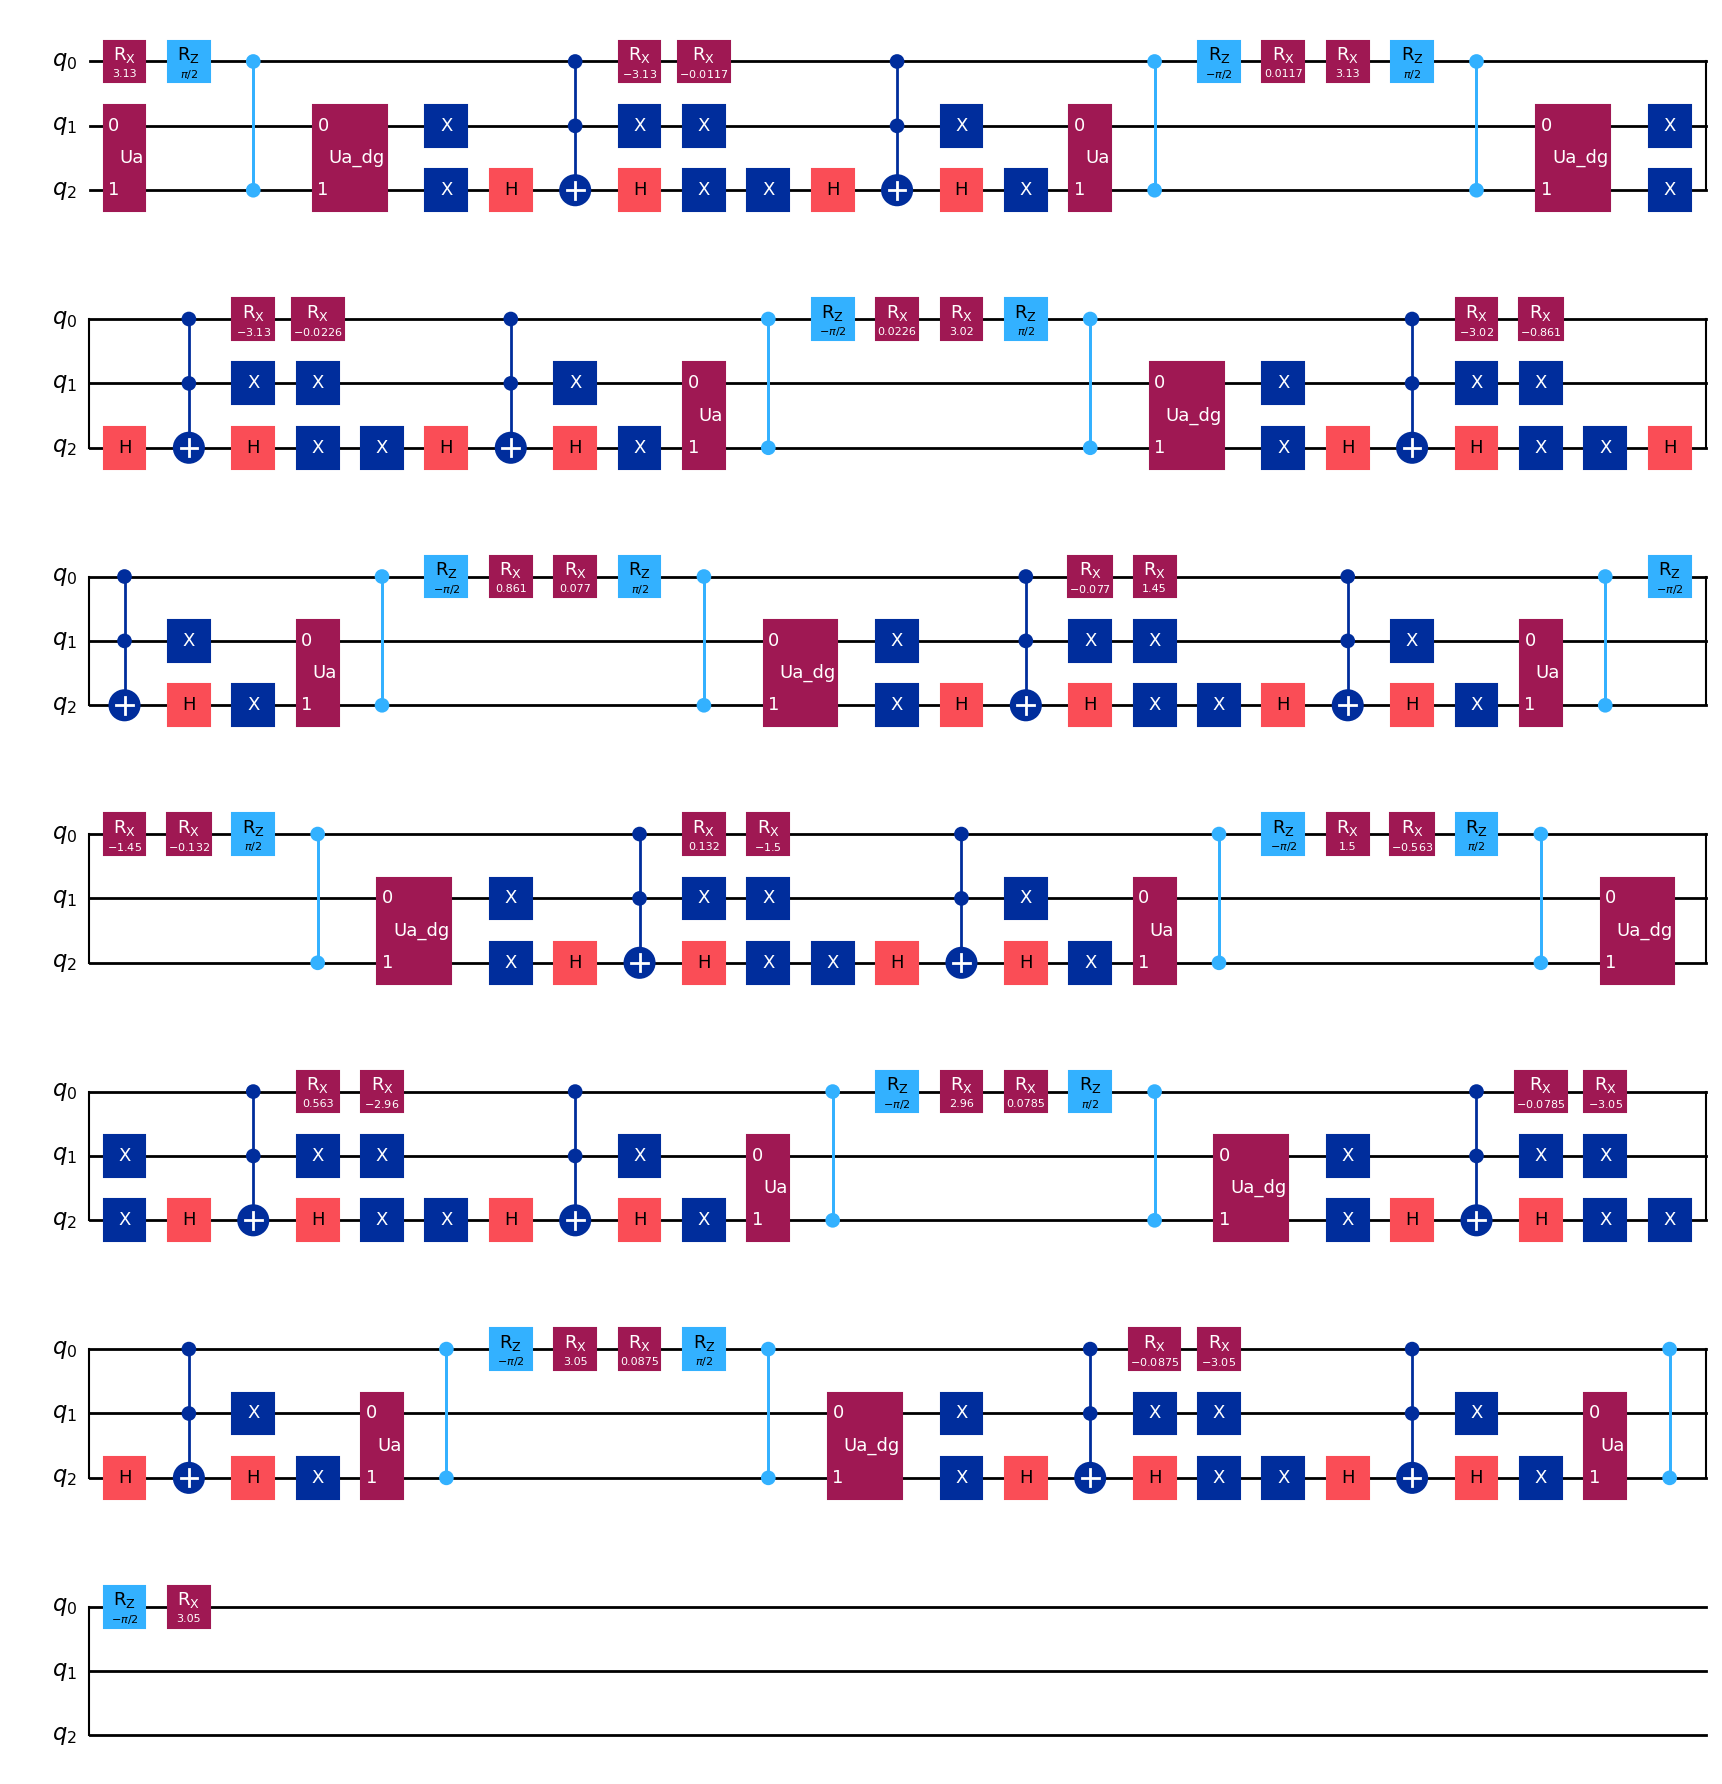

In [4]:
V_phi_qc = make_V_phi_qc(angle_list, Ua_qc)
V_phi_qc.draw("mpl")

### Make main circuit

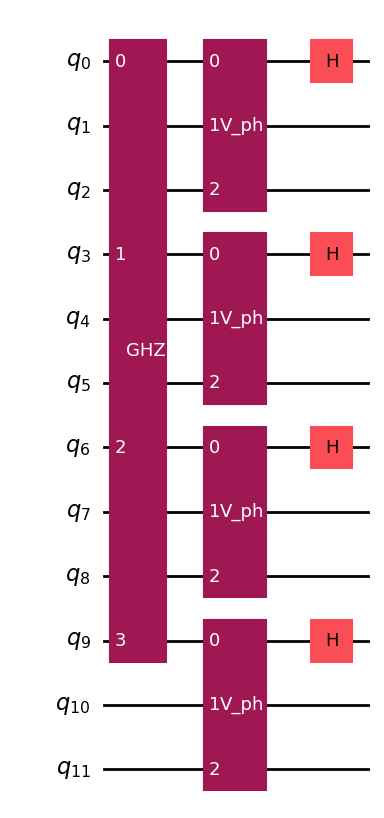

In [5]:
# make main circuit
n_parallel = 4
n_series = 1

parallel_qc_X = make_parallel_qc(V_phi_qc, n_parallel, n_series, "X")
parallel_qc_Y = make_parallel_qc(V_phi_qc, n_parallel, n_series, "Y")

parallel_qc_X.draw("mpl")

### Simulate circuit and check results

In [6]:
# make main circuit
n_parallel = 4
n_series = 1

parallel_qc_X = make_parallel_qc(V_phi_qc, n_parallel, n_series, "X")
parallel_qc_Y = make_parallel_qc(V_phi_qc, n_parallel, n_series, "Y")

# simulate circuit
n_shots = 10000
simulator = AerSimulator(method='matrix_product_state')

sampling_result = sampling_circuit(parallel_qc_X, n_shots, simulator)
test_results = process_result(n_qubit, sampling_result)
print(f"Sampling results (|±_P> measurement): |+_P> {test_results[0]}, |-_P> {test_results[1]}")
print(f"Estimated probability: {test_results[0]/10000}, {test_results[1]/10000}")
print(f"Exact probability    : {(1 + math.cos(n_parallel * n_series * (2 * math.cos(theta * 2)))) / 2}, {(1 - math.cos(n_parallel * n_series * (2 * math.cos(theta * 2)))) / 2}")

sampling_result = sampling_circuit(parallel_qc_Y, n_shots, simulator)
test_results = process_result(n_qubit, sampling_result)
print(f"Sampling results (|±_P> measurement): |+i_P> {test_results[0]}, |-i_P> {test_results[1]}")
print(f"Estimated probability: {test_results[0]/10000}, {test_results[1]/10000}")
print(f"Exact probability    : {(1 + math.sin(n_parallel * n_series * (2 * math.cos(theta * 2)))) / 2}, {(1 - math.sin(n_parallel * n_series * (2 * math.cos(theta * 2)))) / 2}")


Sampling results (|±_P> measurement): |+_P> 8996, |-_P> 1004
Estimated probability: 0.8996, 0.1004
Exact probability    : 0.9050918015573977, 0.09490819844260229
Sampling results (|±_P> measurement): |+i_P> 2023, |-i_P> 7977
Estimated probability: 0.2023, 0.7977
Exact probability    : 0.2069119034983135, 0.7930880965016864


# Evaluate query complexity

In [7]:
# set parameters
n_qubit = 2
ry_angle = 1 / 4 * math.pi  # a = sin^2(θ/2)
K = 3  # 2**(K-1) is maximum number of multiples
n_trial = 100
n_parallel_list = [2**k for k in range(K)]
n_series_list = [1 for _ in range(K)]
gamma = 4.0835  # parameter derived in Belliardo2020
nu_K_list = [7.0, 18.0]  # parameter derived in Belliardo2020
degree_L_X_list = [10, 12, 12, 14, 16, 18, 20, 20, 22] # determined from the preliminary experiment
degree_L_Y_list = [12, 14, 14, 14, 16, 18, 20, 20, 22] # determined from the preliminary experiment

# set Qiskit simulator
simulator = AerSimulator(method='matrix_product_state')

# make circuits
Ua_qc, amplitude, theta = make_Ua_ry_qc(n_qubit, ry_angle)

# print settings
print("------------------------settings------------------------")
print(f"n_qubit            : {n_qubit}")
print(f"n_trial            : {n_trial}")
print(f"K                  : {K}")
print(f"max num of multiple: {2**(K-1)}")
print(f"amplitude(sin^2θ)  : {amplitude}")
print(f"θ                  : {theta}")
print(f"n_parallel_list    : {n_parallel_list}")
print(f"n_series_list      : {n_series_list}")
print(f"γ                  : {gamma}")
print(f"ν_K list           : {nu_K_list}")
print(f"degree_L_X_list    : {degree_L_X_list}")
print(f"degree_L_Y_list    : {degree_L_Y_list}")
print("\n")

------------------------settings------------------------
n_qubit            : 2
n_trial            : 100
K                  : 3
max num of multiple: 4
amplitude(sin^2θ)  : 0.14644660940672624
θ                  : 0.39269908169872414
n_parallel_list    : [1, 2, 4]
n_series_list      : [1, 1, 1]
γ                  : 4.0835
ν_K list           : [7.0, 18.0]
degree_L_X_list    : [10, 12, 12, 14, 16, 18, 20, 20, 22]
degree_L_Y_list    : [12, 14, 14, 14, 16, 18, 20, 20, 22]




In [8]:
# make circuit
parallel_qc_X_list = []
parallel_qc_Y_list = []
for k in range(K):
    angle_list = calculate_angle_sequence(L=degree_L_X_list[k], n_time_length=1) # n_time_length is set as 1, because large T may destabilize the computation of the QSP
    V_phi_qc = make_V_phi_qc(angle_list, Ua_qc)
    parallel_qc_X = make_parallel_qc(V_phi_qc, n_parallel_list[k], n_series_list[k], "X")
    parallel_qc_X_list.append(parallel_qc_X)
    
    angle_list = calculate_angle_sequence(L=degree_L_Y_list[k], n_time_length=1) # n_time_length is set as 1, because large T may destabilize the computation of the QSP
    V_phi_qc = make_V_phi_qc(angle_list, Ua_qc)
    parallel_qc_Y = make_parallel_qc(V_phi_qc, n_parallel_list[k], n_series_list[k], "Y")
    parallel_qc_Y_list.append(parallel_qc_Y)

Completion part finished within time  0.0020122528076171875
Decomposition part finished within time  0.01121068000793457
Final error = 0.011803410285866744
angle_list  :  [np.float64(-1.5440576782275768), np.float64(0.010782574788294141), np.float64(0.08502931050983076), np.float64(0.46070019292207554), np.float64(0.9846327531118173), np.float64(0.4039314742945109), np.float64(-0.9846187627967775), np.float64(0.4606887245843932), np.float64(-0.08456371841130751), np.float64(0.01078191760790434), np.float64(0.02456831000756994)]
Completion part finished within time  0.0
Decomposition part finished within time  0.008137702941894531
Final error = 0.004342231979881664
angle_list  :  [np.float64(-1.5548766538866534), np.float64(0.0018135432191077605), np.float64(0.018150437191655655), np.float64(0.14108060432274483), np.float64(0.6855196123391357), np.float64(1.067802324930043), np.float64(0.028137072932887697), np.float64(-1.0678023249300441), np.float64(0.6855196123391347), np.float64(-0.

In [9]:
error_list = np.zeros(K * int(len(nu_K_list)), dtype=float)
n_multiple_list = [n_parallel * n_series for n_parallel, n_series in zip(n_parallel_list, n_series_list)]

# estimate a n_trial times 
for temp_trial in range(n_trial):
    print("n_trial=(%d/%d)\r" % ((temp_trial + 1), n_trial), flush=True)
    a_est_list = []
    for K_max in range(1, K + 1):
        for nu_K in nu_K_list:
            result_list_X = []
            result_list_Y = []
            temp_shots_list = [round(gamma * (K_max - j) + nu_K)
                                for j in range(1, K_max + 1)]
            for k in range(K_max):
                sampling_result_X = sampling_circuit(parallel_qc_X_list[k].copy(), temp_shots_list[k], simulator)
                sampling_result_Y = sampling_circuit(parallel_qc_Y_list[k].copy(), temp_shots_list[k], simulator)
                result_0, result_1 = process_result(n_qubit, sampling_result_X)
                result_p, result_m = process_result(n_qubit, sampling_result_Y)
                result_list_X.append(result_0)
                result_list_Y.append(result_p)
            # print("result_list (X measurement): ", result_list_X)
            # print("result_list (Y measurement): ", result_list_Y)
            temp_a_est_list = estimate_a_rqpe(result_list_X, result_list_Y, n_multiple_list[:K_max], temp_shots_list)
            print("a_est_list : ", temp_a_est_list)
            a_est_list.append(temp_a_est_list[-1])

    error_list += (np.array(a_est_list) - amplitude)**2  # list of estimation errors

error_list = (error_list / (n_trial-1))**(1/2)

oracle_call_list = []
for K_max in range(1, K + 1):
    for nu_K in nu_K_list:
        temp_shots_list = [round(gamma * (K_max - j) + nu_K) for j in range(1, K_max + 1)]
        oracle_call_list.append(calc_oracle_calls(K_max - 1, temp_shots_list, n_multiple_list, degree_L_X_list, degree_L_Y_list))

n_trial=(1/100)
a_est_list :  [0.20852386]
a_est_list :  [0.10730092]
a_est_list :  [0.12996589 0.13197536]
a_est_list :  [0.10730092 0.17068823]
a_est_list :  [0.09065888 0.14058242 0.1563883 ]
a_est_list :  [0.10730092 0.1197595  0.14606651]
n_trial=(2/100)
a_est_list :  [0.20852386]
a_est_list :  [0.00274484]
a_est_list :  [0.04073791 0.15791239]
a_est_list :  [0.18016512 0.18993131]
a_est_list :  [0.28286515 0.0670821  0.1563883 ]
a_est_list :  [0.18192565 0.13197536 0.16118655]
n_trial=(3/100)
a_est_list :  [0.20852386]
a_est_list :  [0.16854558]
a_est_list :  [0.13496522 0.08262647]
a_est_list :  [0.01217432 0.15214725]
a_est_list :  [0.15664981 0.14751974 0.17169947]
a_est_list :  [0.10730092 0.17068823 0.13899457]
n_trial=(4/100)
a_est_list :  [0.20852386]
a_est_list :  [0.19699359]
a_est_list :  [0.12996589 0.08262647]
a_est_list :  [0.17386393 0.0799673 ]
a_est_list :  [0.12394296 0.05397248 0.13260665]
a_est_list :  [0.19909438 0.09596843 0.14221338]
n_trial=(5/100)
a_est_li

Text(0, 0.5, 'estimation error (RMSE)')

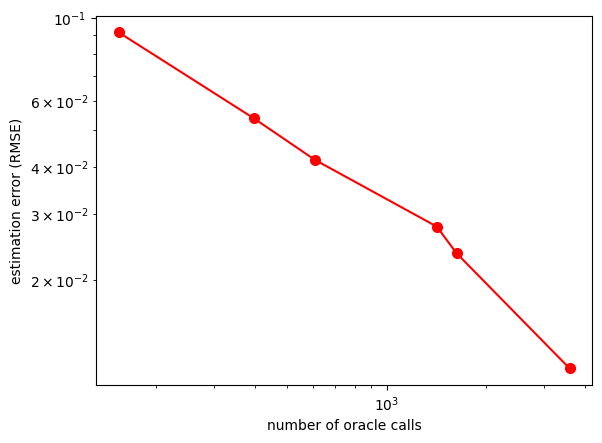

In [10]:
error_list_plot = plt.plot(oracle_call_list, error_list, marker='o', markersize=7, linestyle="-", color="red")
plt.xscale('log')
plt.xlabel("number of oracle calls")
plt.yscale('log')
plt.ylabel("estimation error (RMSE)")